In [1]:
# Mahalanobis Distance between images
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import cv2

In [2]:
def rgb_mahalanobis_distance(img, icov, mean_foco):
    """
    img: image
    icov: inverse of covariance matrix
    mean_foco: mean of the image to compare
    """
    img = img.reshape(3,-1)
    img_mu = img - mean_foco

    first_matrix = img_mu.T @ icov

    second_matrix = first_matrix @ img_mu

    return np.sqrt(second_matrix)

# Read image in np
img = cv2.imread("images/image.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

dist_foco = img[600:700, 700:1225, :]
cov_matrix = np.cov(dist_foco.reshape(-1, 3).T)
cov_matrix_inv = np.linalg.inv(cov_matrix)
mean_foco = np.mean(dist_foco.reshape(-1, 3), axis=0)
mean_foco = mean_foco.reshape(3,-1)


$d_M(\vec{x}, Q) = \sqrt{(\vec{x} - \vec{\mu})^\mathsf{T} S^{-1} (\vec{x} - \vec{\mu})}$

In [3]:
img2 = np.zeros(img.shape[:-1])

for i, line in enumerate(img):
    for j, pixel in enumerate(line):
        img2[i,j] = rgb_mahalanobis_distance(pixel, cov_matrix_inv, mean_foco)

img2 = (img2*255/img2.max()).astype(np.uint8)

In [19]:
im = Image.fromarray(img2)
im = ImageOps.equalize(im)
im = im.point(lambda x: 0 if x>30 else 1)

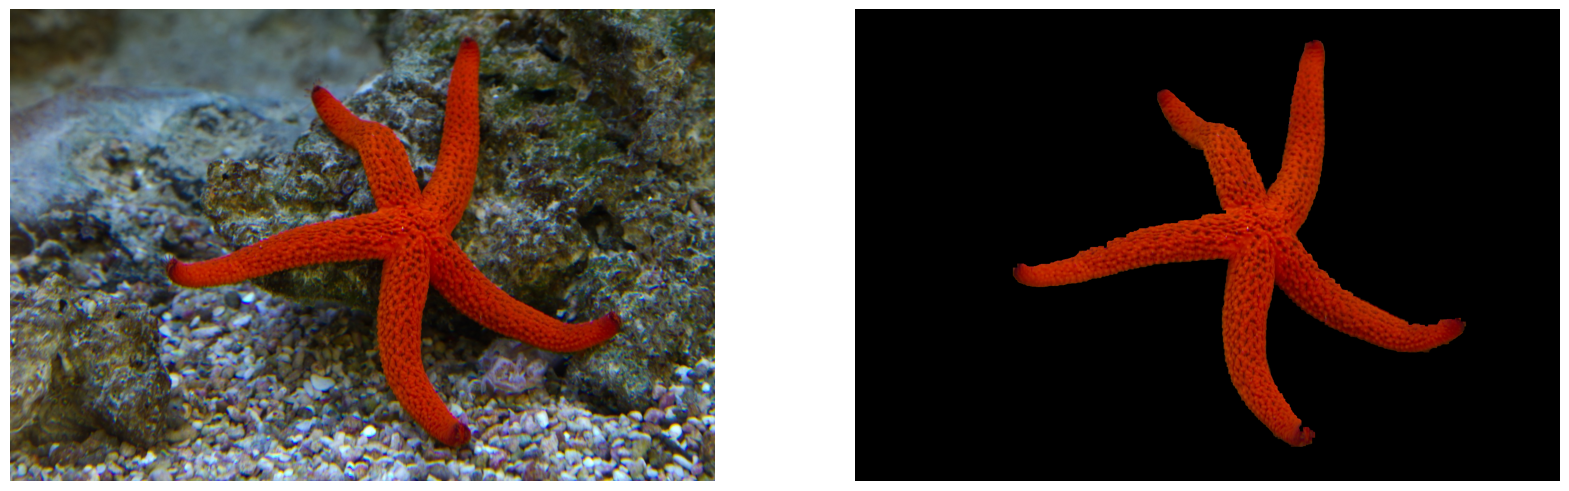

In [36]:
img3 = np.array(im)
img3 = cv2.morphologyEx(img3, cv2.MORPH_OPEN, np.ones((5,5), np.uint8), iterations=3)
img3 = cv2.morphologyEx(img3, cv2.MORPH_CLOSE, np.ones((7,7), np.uint8), iterations=1)

plt.figure(figsize=(20,20))
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(img3.reshape(*img3.shape,1)*img)

plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(img)

plt.show()
plt.close()